## Conjunto de Dados Salariais de Empresas para Diversos Cargos e Funções
* Este conjunto de dados salariais contém informações reais de remuneração coletadas de múltiplas empresas em diferentes localizações, cargos e tipos de contratação. Ele foi projetado para ajudar na compreensão de tendências salariais, distribuição de pagamentos e fatores que influenciam a remuneração no mercado de trabalho.
* O conjunto de dados consiste em mais de 22.000 registros, sendo ideal para Análise Exploratória de Dados (EDA), limpeza de dados, visualização e geração de insights de negócios usando Python.
* Os dados estão disponíveis em formato CSV e serão analisados utilizando o Pandas DataFrame.

## Perguntas do Projeto :

* P1: Quais departamentos possuem a maior média salarial?
* P2: Quais cidades oferecem a maior média salarial?
* P3: Nomeie as 5 empresas localizadas em 'New Delhi' com avaliação '5' que oferecem os salários mais altos e os mais baixos.
* P4: Qual título de cargo possui o maior número de salários reportados?
* P5: Verifique e demonstre a relação entre as Avaliações (Ratings) da empresa e os Salários.
* P6: O tipo de contrato (status de emprego) afeta o salário?

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore") 
pd.options.mode.chained_assignment = None

In [64]:
df = pd.read_csv('dataset_salario.csv', sep = ',')
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [65]:
#Visualizando como dashboard está distribuido em relação aos tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [66]:
##Percebe-se que há um valor nulo na coluna 'Company Name'
df.isna().sum()

Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [67]:
#Procurando uma linha que tenha alguma coluna com um valor nulo no dataset, ja sabendo que so tem uma ,podemos analisar como essa linha está disposta.
linhas_nulas = df[df.isna().any(axis=1)]
linhas_nulas


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
13760,4.0,NaN,Software Development Engineer,1188000,1,Bangalore,Full Time,SDE


In [68]:
#Como somente a coluna de Company Name está com dados faltantes, vamos trocar o NaN por Unavailable
df = df.fillna('Unavailable')
df[df.index==13760]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
13760,4.0,Unavailable,Software Development Engineer,1188000,1,Bangalore,Full Time,SDE


In [69]:
#Garantindo que o dataset não tenha linhas duplicadas
df = df.drop_duplicates()
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


Text(0.5, 1.0, 'Distribuição salarial')

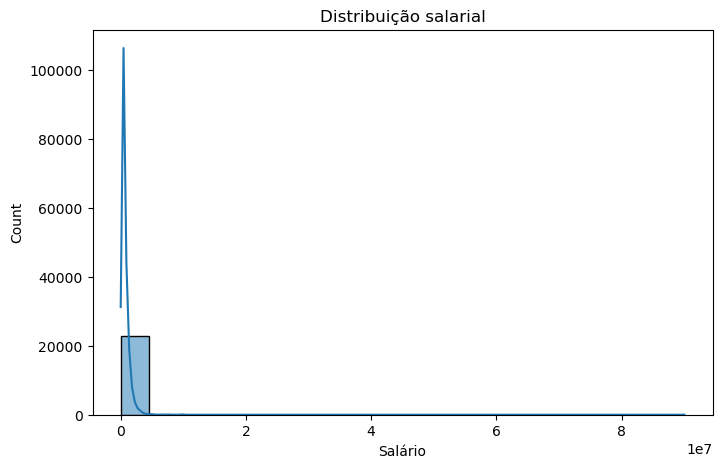

In [70]:
#Analisando a distribuição salarial, percebi valores foras da curva, por conta de casos rarissimos ou com erro de preenchimento, que distorcem a media
plt.figure(figsize = (8,5))

sns.histplot(df['Salary'], bins =20, kde = True)

plt.xlabel('Salário')
plt.title('Distribuição salarial')

# Pergunta 1  - Quais departamentos possuem a maior média Salarial?

In [71]:
#Para responder a pergunta,optei por remover alguns outliers do projeto, utilizando o IQR, para calcular o que está fora da realidade do dataset

# 1. Calculando os quartis
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# 2. Definindo os limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['Salary'] >= limite_inferior) & (df['Salary'] <= limite_superior)]

Text(0.5, 0, 'Salário')

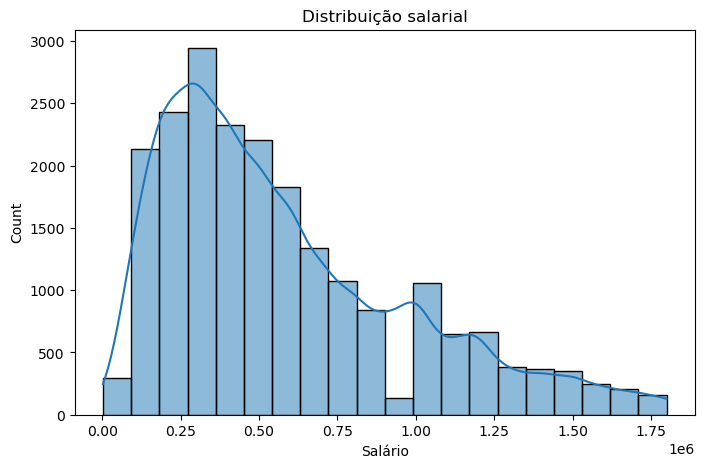

In [72]:
#Agora analisando como ficou a distribuição salarial depois de tratar os dados pelo método IQR
plt.figure(figsize = (8,5))

sns.histplot(df['Salary'], bins =20, kde = True)

plt.title('Distribuição salarial')
plt.xlabel('Salário')

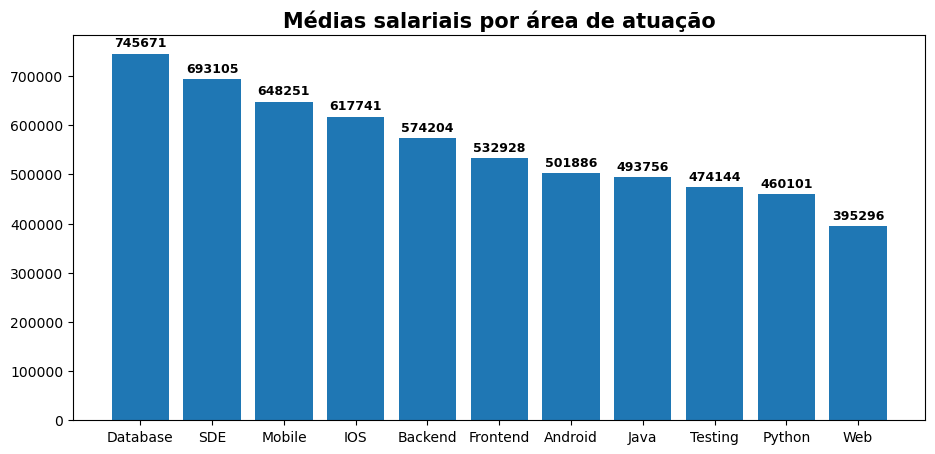

In [73]:
#Respondendo a pergunta 1 - Cargos com a maior média salarial, no TOP 3 se encontram Database, SDE e Mobile/IOS

df_salario = df.groupby('Job Roles')['Salary'].mean().sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (11,5))

ax.bar(df_salario.index, df_salario.values)
ax.set_title('Médias salariais por área de atuação', fontweight = 'bold', fontsize = 15)
ax.grid(False)

for i, v in enumerate(df_salario.values):
    ax.text(i,v + df_salario.max() * 0.01,f'{v:.0f}',ha="center",va="bottom",fontsize=9,rotation= 0, fontweight = 'bold')

plt.savefig('media_salarial_cargo',dpi=300, bbox_inches='tight')


# Pergunta 2 - Quais cidades oferecem a maior média Salarial?

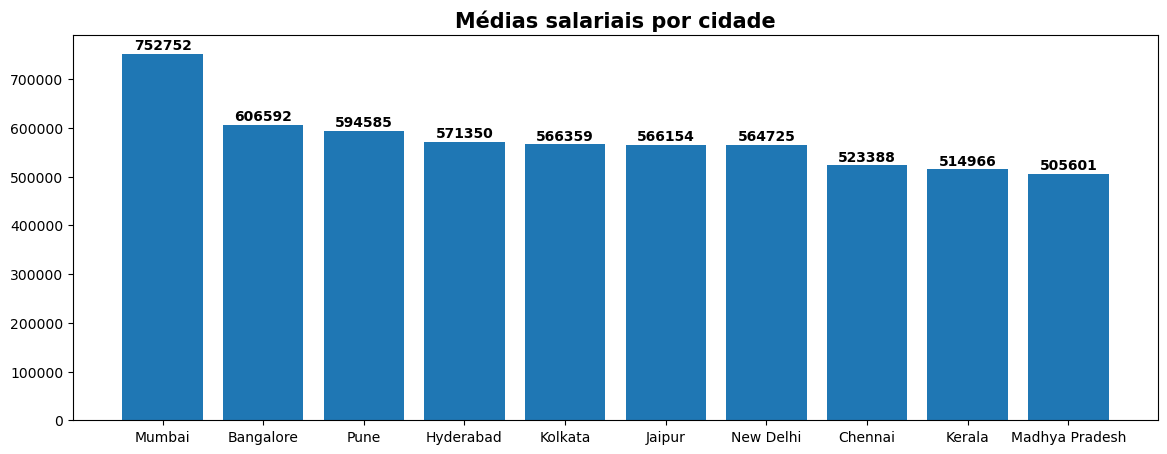

In [89]:
#As cidades estão localizadas na coluna de Location,são 10 cidades então podemos ver que as médias salarais são bem distribuidas e que Mumbai se sobressai

df_cidades = df.groupby('Location')['Salary'].mean().sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (14,5))

ax.bar(df_cidades.index, df_cidades.values, color = 'blue')
ax.set_title('Médias salariais por cidade', fontweight = 'bold', fontsize = 15)

bars = ax.bar(df_cidades.index,df_cidades.values)

ax.bar_label(bars, padding=1, fmt='{:.0f}', fontweight='bold')
ax.grid(False)
plt.savefig('media_salarial_cidade',dpi=300, bbox_inches='tight')

plt.show()

# Pergunta 3 - Nomeie as 5 empresas localizadas em 'New Delhi', com avaliação '5' que oferecem os salários mais altos e os mais baixos.

In [75]:
#É preciso filtrar o dataframe original pelo nome da cidade e com avaliação(coluna de rating) 5

df_empresa = df[(df['Location']=='New Delhi') & (df['Rating'] == 5)]

df_empresa

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
1669,5.0,Ango Health,Android Developer,336000,2,New Delhi,Full Time,Android
1723,5.0,Neo Fitnes,Android Developer,100000,1,New Delhi,Full Time,Android
1751,5.0,Fixdax Technology,Android Developer,300000,1,New Delhi,Full Time,Android
1754,5.0,NSPS,Android Developer,216000,1,New Delhi,Full Time,Android
1761,5.0,Upper Dauphin Area School District,Android Developer,1000000,1,New Delhi,Full Time,Android
...,...,...,...,...,...,...,...,...
18457,5.0,Minder,Software Development Engineer (SDE),1000000,1,New Delhi,Full Time,SDE
18574,5.0,Codebugged AI,Software Development Engineer (SDE),120000,1,New Delhi,Full Time,SDE
18659,5.0,Move78,Software Development Engineer (SDE),700000,1,New Delhi,Full Time,SDE
18680,5.0,Atom 8,Software Development Engineer (SDE) - Intern,60000,1,New Delhi,Intern,SDE


In [76]:
#5 maiores salários
maiores_salarios = df_empresa.nlargest(5, 'Salary')
maiores_salarios

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
18393,5.0,Firevol,Software Development Engineer (SDE),1700000,1,New Delhi,Full Time,SDE
1888,5.0,Trillbit,Android Developer,1500000,1,New Delhi,Full Time,Android
6750,5.0,Hapramp,Front End Developer,1500000,1,New Delhi,Full Time,Frontend
17488,5.0,The Art of Mike Mignola,Software Development Engineer,1500000,1,New Delhi,Full Time,SDE
8284,5.0,Silicon Valley Recycling,Senior IOS Developer,1400000,1,New Delhi,Full Time,IOS


In [77]:
#5 menores salários
menores_salarios = df_empresa.nsmallest(5, 'Salary')
menores_salarios

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
2334,5.0,Hopin (India),Android Developer - Intern,60000,1,New Delhi,Intern,Android
17524,5.0,Star Catalysts,Software Development Engineer - Intern,60000,1,New Delhi,Intern,SDE
18680,5.0,Atom 8,Software Development Engineer (SDE) - Intern,60000,1,New Delhi,Intern,SDE
1969,5.0,WorkingNation,Android Developer - Intern,84000,1,New Delhi,Intern,Android
1723,5.0,Neo Fitnes,Android Developer,100000,1,New Delhi,Full Time,Android


# Pergunta 4 - Qual título de cargo possui o maior número de salários reportados?

In [78]:
#Respondendo essa pergunta, percebi que existem duas categorias Software Development Engineer(SDE) e Software Development Engineer
#Na realidade esses cargos são a mesma coisa, então optei por transformar os dois em um único dado

df['Job Title'] = df['Job Title'].replace('Software Development Engineer (SDE)', 'Software Development Engineer')

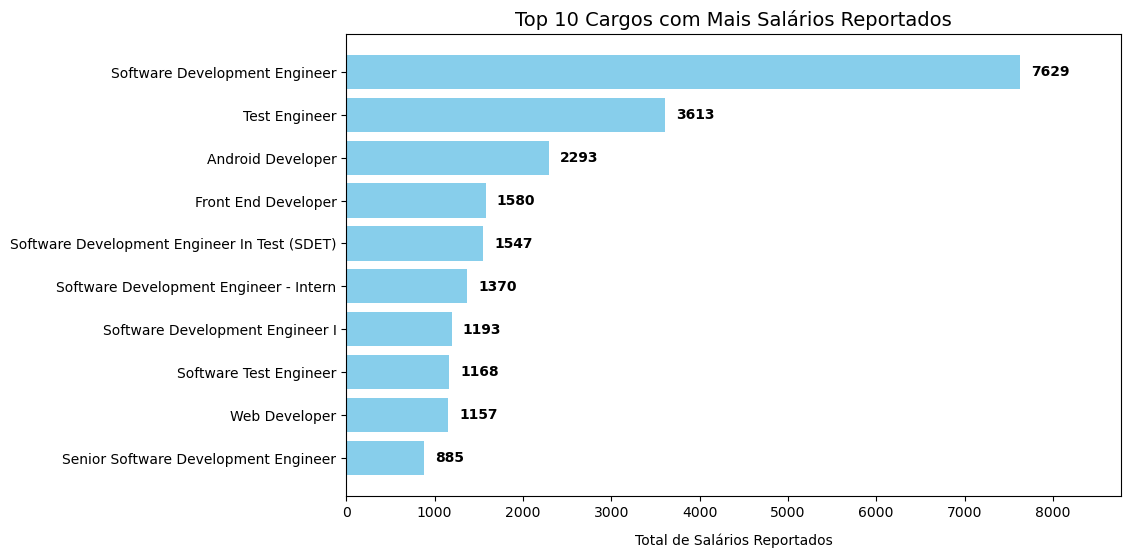

In [79]:
df_reported = df.groupby('Job Title')['Salaries Reported'].sum().sort_values(ascending = False)

#Selecionando apenas os 10 primeiros
top_10_cargos = df_reported.head(10)


fig, ax = plt.subplots(figsize=(10, 6))

#Armazenando as barras em uma variável, mantendo o gráfico decrescente, para depois adicionarmos os rótulos de dados
bars = ax.barh(top_10_cargos.index[::-1], top_10_cargos.values[::-1], color='skyblue')

ax.set_title('Top 10 Cargos com Mais Salários Reportados', fontsize=14)
ax.set_xlabel('Total de Salários Reportados', labelpad = 10)
ax.bar_label(bars, padding=8, fontsize=10, fontweight='bold')
ax.set_xlim(0, max(top_10_cargos.values) * 1.15)
ax.grid(False)

plt.show()

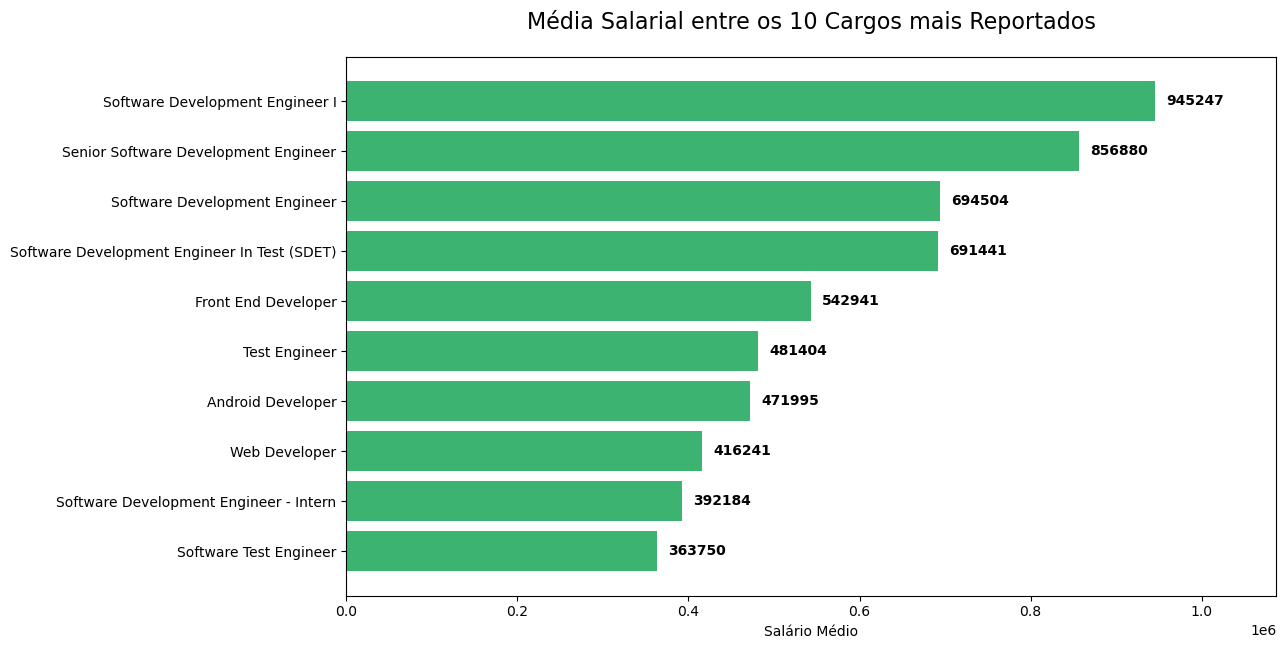

In [80]:
# Gerando um gráfico da média Salarial entre os cargos com mais salários Reportados

df_top_10_medias = df[df['Job Title'].isin(top_10_cargos.index)]


media_salarial = df_top_10_medias.groupby('Job Title')['Salary'].mean().sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(12, 7))


bars = ax.barh(media_salarial.index[::-1], media_salarial.values[::-1], color='mediumseagreen')


ax.bar_label(bars, padding=8, fmt='{:.0f}', fontsize=10, fontweight='bold')

ax.set_title('Média Salarial entre os 10 Cargos mais Reportados', fontsize=16, pad=20)
ax.set_xlabel('Salário Médio')
ax.set_xlim(0, max(media_salarial.values) * 1.15)
ax.grid(False)

plt.show()

* Percebemos então que, muitas vezes, o cargo com mais reports não é o que tem a maior média salarial. Isso pode acontecer por alguns motivos, dentre eles podemos citar o fato de que cargos com muita gente tendem a ter muitos salários de "entrada" (júnior) que puxam a média para baixo.

## Pergunta 5 - Verifique e demonstre a relação entre as Avaliações (Ratings) da empresa e os Salários.

Text(0.5, 1.0, 'Avaliação vs Salario')

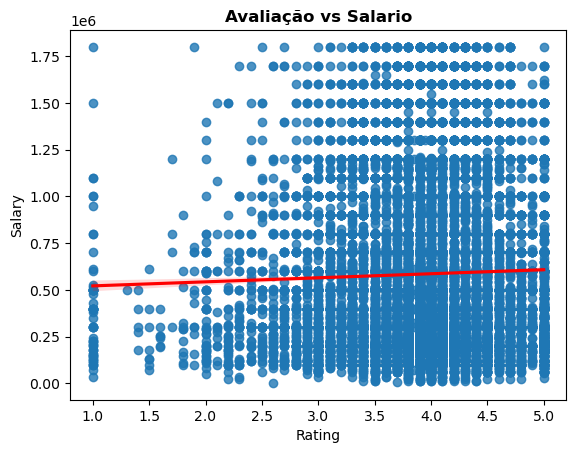

In [81]:
#Fazendo uma regressão linear para identificar se existe uma relação de causa e efeito, se uma coisa causa a outra
df
sns.regplot(x = df['Rating'], y= df['Salary'], line_kws={"color" : "red" })
plt.title('Avaliação vs Salario', fontweight = 'bold')


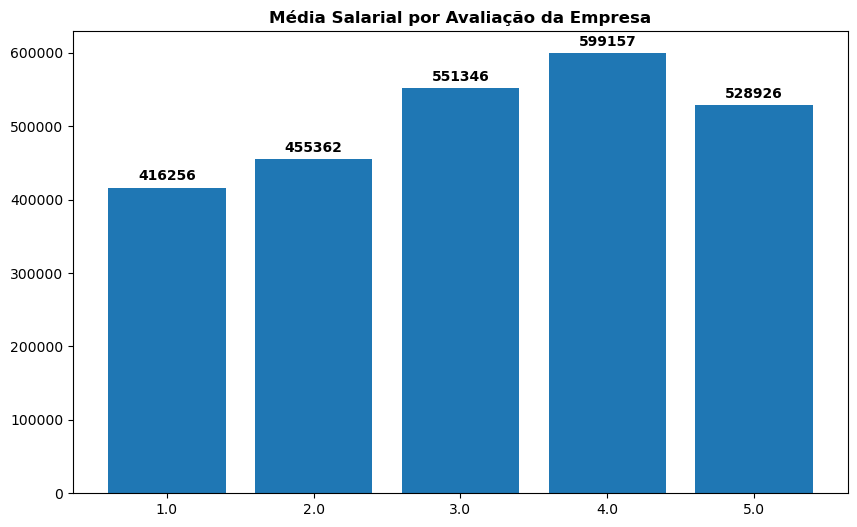

In [103]:
#Fazendo um gráfico de melhor visualização

# Criando faixas de avaliação para simplificar
df['Rating_Group'] = df['Rating'].round()

# Calculando a média salarial por nota
rating_avg = df.groupby('Rating_Group')['Salary'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(rating_avg.index.astype(str), rating_avg.values, color= '#1f77b4')

ax.bar_label(bars, padding=3, fmt='%.0f', fontweight = 'bold')
ax.set_title('Média Salarial por Avaliação da Empresa',fontweight = 'bold')
ax.grid(False)

plt.savefig('media_salarial_por_rating',dpi=300, bbox_inches='tight')
plt.show()

* Observando os dois gráficos, é possível observar que não há uma correlação direta entre o Rating e o nível salarial nessa base de dados.
* Empresas com nota 5.0 apresentam médias salariais muito próximas a empresas com nota 3.0. Isso sugere que alguns fatores, como por exemplo a região geográfica tEm mais peso na remuneração do que a cultura/avaliação da empresa.

# Pergunta 6: O tipo de contrato (status de emprego) afeta o salário?

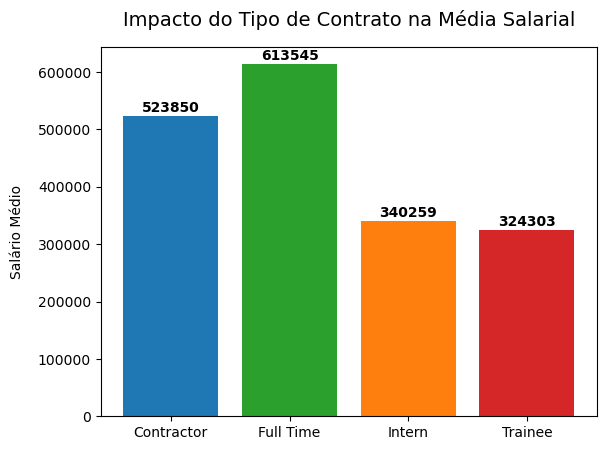

In [49]:
#Criando um gráfico que analisa a média salarial pelo tipo de contrato

#Analisando quantos tipos de status de emprego existem no dataset
df['Employment Status'].unique()

df_status = df.groupby('Employment Status')['Salary'].mean()

fig, ax = plt.subplots()

colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
bars = ax.bar(df_status.index, df_status.values, color=colors)
ax.bar_label(bars, padding=1, fmt='%.0f', fontweight='bold')

ax.set_title('Impacto do Tipo de Contrato na Média Salarial', fontsize=14, pad=15)
ax.set_ylabel('Salário Médio', labelpad = 10)

plt.xticks(rotation=0)
plt.grid(False)
plt.show()

* O tipo de contrato é um dos maiores determinantes do nível salarial. Geralmente, contratos de Full Time ou Contractor apresentam as médias mais altas por conta da alta exigência e à responsabilidade técnica. Já os valores de Intern (Estágio) e Trainee puxam a média para baixo, o que é natural em início de carreira.

# Conclusão Geral

* O projeto revelou que a remuneração média é fortemente ditada pelo cargo e localização, com cidades como Mumbai e Bangalore liderando nos valores de média salarial por cidade.

* Notamos que o Rating da empresa não é um fator decisivo para salários mais altos, quebrando a hipótese de que empresas melhor avaliadas pagam necessariamente mais.

* A limpeza e padronização dos títulos de cargos foram essenciais para evitar duplicidade e garantir a precisão das médias salariais.

* Esse dataset nos mostra o quão valioso é empregos relacionados a área de tecnologia e como os salários de cada departamento/cargo se comportam em relação a outras variáveis